# ML Assigment 2  KNN Classifier

## Group Details:

  Group Number: 53

  Members:

  1) 19CS30043 Shrinivas Khiste

  2) 19CS10050 Rupinder Goyal


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Distance ( Similarity ) Functions

In [ ]:
def euclideanDistance(point1, point2):
  return np.linalg.norm(point1 - point2)

  # basic implementation without numpy
  # distance = 0
  # for i in range(len(point1)):
  #   distance += math.pow(point1[i] - point2[i], 2) 
  # return math.sqrt(distance)

In [ ]:
def cosineSimilarity(point1, point2):
  dotproduct = np.dot(point1, point2)
  mod1 = np.linalg.norm(point1)
  mod2 = np.linalg.norm(point2)
  distance = dotproduct/(mod1 * mod2)
  return - distance

  # basic implementation without numpy
  # dotProduct = 0
  # mod1 = 0
  # mod2 = 0
  # for i in range(len(point1)):
  #   mod1 += math.pow(point1[i], 2)
  # for i in range(len(point2)):
  #   mod2 += math.pow(point2[i], 2)
  # for i in range(len(point1)):
  #   dotProduct += point1[i] * point2[i]
  # mod1 = math.sqrt(mod1)
  # mod2 = math.sqrt(mod2)
  # distance = dotproduct/(mod1 * mod2)
  # return - distance

In [ ]:
def manhattanDistance(point1, point2):
  return np.abs(point1 - point2).sum()

  # basic implementation without numpy
  # distance = 0
  # for i in range(len(point1)):
  #   distance += abs(point1[i] - point2[i])
  # return distance

# Implementation of KNN Classifier

In [ ]:
class KNNClassifier:
  def __init__(self, kValue = 0):
    self.k = kValue

  def fit(self, X_train, Y_train): # just save the train data
    self.X_train = X_train
    self.Y_train = Y_train

  def predict(self, X_test, distanceFunc = euclideanDistance):
    Y_test = []
    for testDataIndex, testDataRow in enumerate(X_test):            # iterating on the test data
      # print(testDataIndex)
      distance_Value = []                                           # it stores the pair of distance and value for each neighbour
      for trainDataIndex, trainDataRow in enumerate(self.X_train):  # iterating on all training data points
        distance = distanceFunc(trainDataRow, testDataRow)          # Calculating distance between testdatapoint and traindata point
        distance_Value.append(  (distance, self.Y_train[trainDataIndex] ) )  # storing the distance and the output value
        distance_Value = sorted(distance_Value)                     # sorting the pairs
        if (len(distance_Value) > self.k):
          distance_Value.pop()
      
      distance_Value = sorted(distance_Value)                       # sorting the pairs
      kNeighbours = distance_Value[:self.k]                         # storing top k points
      distance_Value.clear()
      count0 = 0
      count1 = 0
      for neighbour in kNeighbours:                                 # calculating  the frequency of 0 and 1 
        if neighbour[1] == 1:
          count1 = count1 + 1
        else:
          count0 = count0 + 1
      if count0 > count1:                           
        Y_test.append(0)
      else:
        Y_test.append(1)
    
    Y_test = pd.Series(Y_test)
    return Y_test

  def findOptimalK(self, X_test, distanceFunc = euclideanDistance):
    Y_test = []
    for i in range(len(self.X_train)):
      Y_test.append([])
    for testDataIndex, testDataRow in enumerate(X_test):            # iterating on the test data
      print(testDataIndex)
      distance_Value = []                                           # it stores the pair of distance and value for each neighbour
      for trainDataIndex, trainDataRow in enumerate(self.X_train):  # iterating on all training data points
        distance = distanceFunc(trainDataRow, testDataRow)          # Calculating distance between testdatapoint and traindata point
        distance_Value.append(  (distance, self.Y_train[trainDataIndex] ) ) # storing the distance and the output value
      
      distance_Value = sorted(distance_Value)                       # sorting the pairs
      kNeighbours = distance_Value
      count0 = 0
      count1 = 0
      for i in range(len(self.X_train)):                            # calculating  the frequency of 0 and 1 
        if kNeighbours[i][1] == 1:
          count1 = count1 + 1
        else:
          count0 = count0 + 1
        if count0 > count1:
          Y_test[i].append(0)
        else:
          Y_test[i].append(1)
    
    return Y_test

# Accuracy Function

In [ ]:
def accuracy(list1, list2):
  if (len(list1) != len(list2)):
    raise Exception("Size not Same.")
  if ( len(list1) == 0):
    raise Exception("Empty List")
  count = 0
  for i in range(len(list1)):
    if (list1[i] == list2[i]):
      count = count + 1
  return count/len(list1)

# Loading and train - test split

In [ ]:
df = pd.read_csv("spam_ham_dataset.csv")   # reading the dataset
X = df.drop(columns = ['label', 'Unnamed: 0', 'label_num'])  # X contains text only 
Y = df['label_num']  # output is label_num
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) # splitting data
x_train = x_train.reset_index(drop = True)    # resetting index
x_test = x_test.reset_index(drop = True)      # resetting index
y_train = y_train.reset_index(drop = True)    # resetting index
y_test = y_test.reset_index(drop = True)      # resetting index

# Test Pre-processing

In [ ]:
listTrainData = x_train.values.tolist()                           # converting training data to list
listTrainData = [x[0] for x in listTrainData]  
vectorizer = TfidfVectorizer(input= listTrainData , lowercase=True,stop_words='english') 
train_transformed = vectorizer.fit_transform(listTrainData)       # using tf - idf
x_train_transformed = pd.DataFrame(train_transformed.toarray())   # converting to dataframe
x_train_transformed = np.array(x_train_transformed)

listTestData = x_test.values.tolist()
listTestData = [x[0] for x in listTestData]
test_transformed = vectorizer.transform(listTestData)             # using tf - idf
x_test_transformed = pd.DataFrame(test_transformed.toarray())     # converting into dataframe
x_test_transformed = np.array(x_test_transformed)

In [ ]:
Y.value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

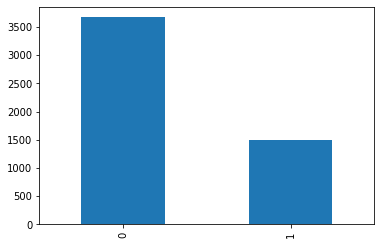

In [ ]:
Y.value_counts().plot.bar()

# Prediction of test data

In [ ]:
knn = KNNClassifier(5)
knn.fit(x_train_transformed, y_train)
y_pred = knn.predict(x_test_transformed, distanceFunc=euclideanDistance)

In [ ]:
accuracy(y_pred, y_test)

0.961352657004831

# Graph Plotting


In [ ]:
K_value = [x + 1 for x in range(len(x_train_transformed))]

## Euclidean Distance

In [ ]:
knn = KNNClassifier()
knn.fit(x_train_transformed, y_train)
ansEuc = knn.findOptimalK(x_test_transformed, distanceFunc=euclideanDistance)

In [ ]:
accuracy_rate_euclidean = []
for i in range(len(x_train_transformed)):
  accuracy_rate_euclidean.append(accuracy(ansEuc[i], y_test))

Plot of Accuracy vs K- value ( using Euclidean Distance) for K values from 1 to size of training data

Text(0, 0.5, 'Accuracy')

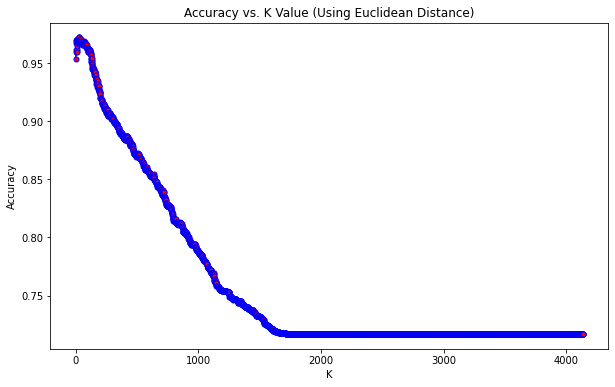

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value,accuracy_rate_euclidean,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Euclidean Distance)')
plt.xlabel('K')
plt.ylabel('Accuracy')

Looks like the peak lies in the range [0, 300] , plotting the graph for the range [0, 300]

Text(0, 0.5, 'Accuracy')

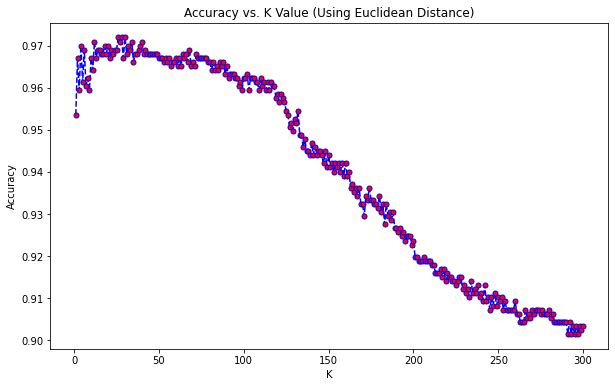

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value[:300],accuracy_rate_euclidean[:300],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Euclidean Distance)')
plt.xlabel('K')
plt.ylabel('Accuracy')

Peak lies in the range [0, 50]


Text(0, 0.5, 'Accuracy')

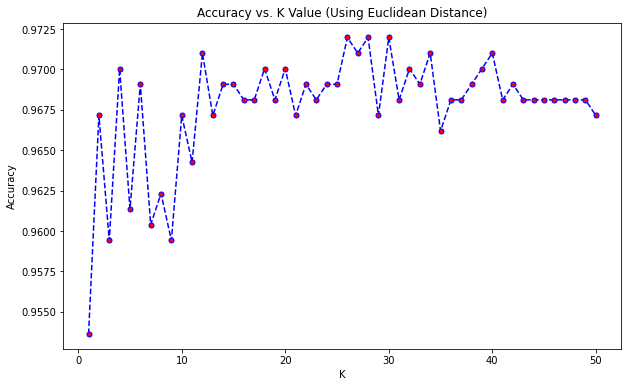

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value[:50],accuracy_rate_euclidean[:50],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Euclidean Distance)')
plt.xlabel('K')
plt.ylabel('Accuracy')

Peak lies in range [20:30]


Text(0, 0.5, 'Accuracy')

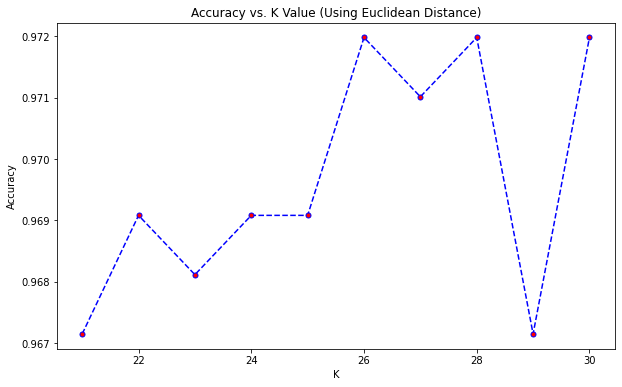

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value[20:30],accuracy_rate_euclidean[20:30],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Euclidean Distance)')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
accuracy_rate_euclidean[25]

0.9719806763285024

Peak is at K = 26 . Accuracy = 0.97198067

## Manhattan Distance

In [ ]:
knn = KNNClassifier()
knn.fit(x_train_transformed, y_train)
ansMan = knn.findOptimalK(x_test_transformed, distanceFunc=manhattanDistance)

In [ ]:
accuracy_rate_manhattan = []
for i in range(len(x_train_transformed)):
  accuracy_rate_manhattan.append(accuracy(ansMan[i], y_test))

Plotting the graph of Accuracy vs K - value ( using manhattan Distance).

K value varies from 1 to size of training data

Text(0, 0.5, 'Accuracy')

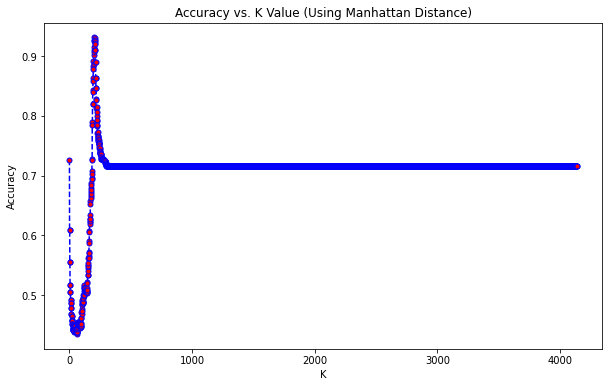

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value,accuracy_rate_manhattan,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Manhattan Distance)')
plt.xlabel('K')
plt.ylabel('Accuracy')

Peak Lies in the range [0:500].

Plotting the graph for the same

Text(0, 0.5, 'Accuracy')

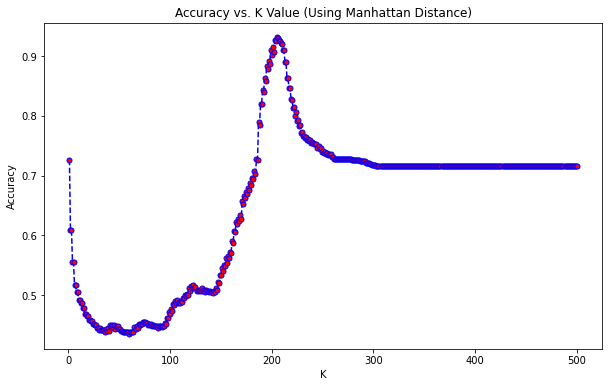

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value[:500],accuracy_rate_manhattan[:500],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Manhattan Distance)')
plt.xlabel('K')
plt.ylabel('Accuracy')

Peak lies in the range [180-240]

Plotting the graph for the same

Text(0, 0.5, 'Accuracy')

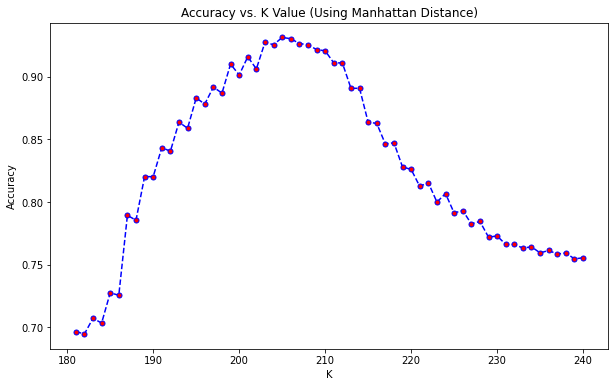

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value[180:240],accuracy_rate_manhattan[180:240],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Manhattan Distance)')
plt.xlabel('K')
plt.ylabel('Accuracy')

Peak lies in the range [200 - 210]

Plotting the graph for the same

Text(0, 0.5, 'Accuracy')

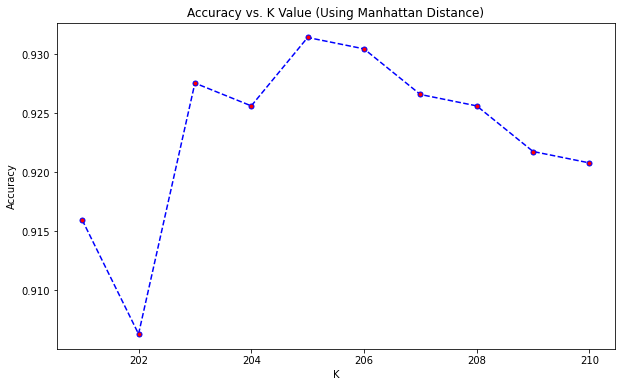

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value[200:210],accuracy_rate_manhattan[200:210],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Manhattan Distance)')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
accuracy_rate_manhattan[204]

0.9314009661835749

Peak is at k = 205.

Accuracy = 0.931400

## Using Cosine Similarity

In [ ]:
knn = KNNClassifier()
knn.fit(x_train_transformed, y_train)
ansCosine = knn.findOptimalK(x_test_transformed, distanceFunc=cosineSimilarity)

In [ ]:
accuracy_rate_cosine = []
for i in range(len(x_train_transformed)):
  accuracy_rate_cosine.append(accuracy(ansCosine[i], y_test))

Plotting the graph of Accuracy vs K - value ( using cosine similarity )

K - value varies from 1 to size of training data

Text(0, 0.5, 'Accuracy')

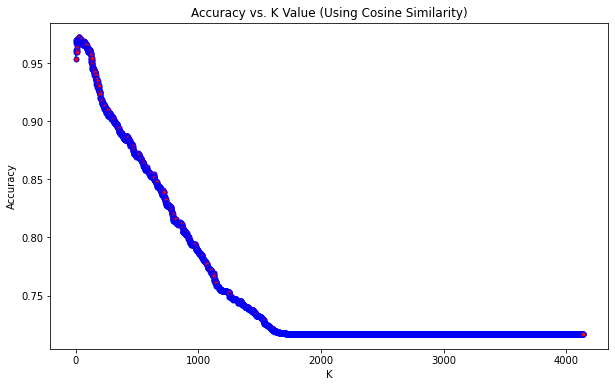

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value,accuracy_rate_cosine,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Cosine Similarity)')
plt.xlabel('K')
plt.ylabel('Accuracy')

Peak lies in the range [ 0: 300]

Plotting the graph for the same

Text(0, 0.5, 'Accuracy')

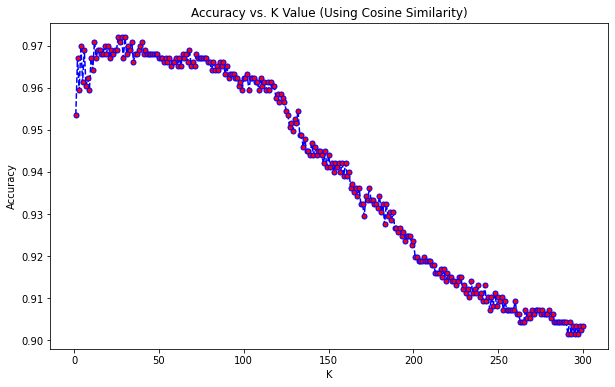

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value[:300],accuracy_rate_cosine[:300],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Cosine Similarity)')
plt.xlabel('K')
plt.ylabel('Accuracy')

Peaks lies in the range [0: 50]

Plotting the graph for the range [0:50]

Text(0, 0.5, 'Accuracy')

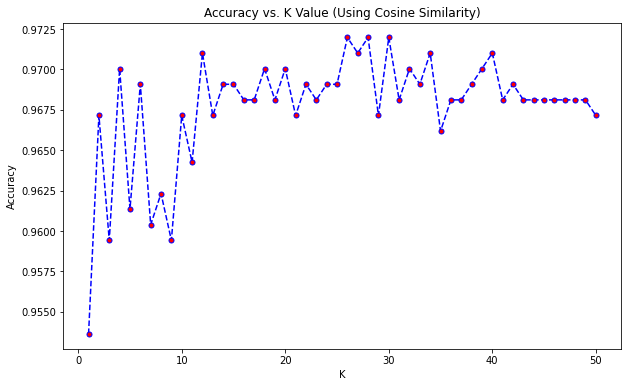

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value[:50],accuracy_rate_cosine[:50],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Cosine Similarity)')
plt.xlabel('K')
plt.ylabel('Accuracy')

Peak lies in the range [20:30]

Plotting the graph for the range [20: 30]

Text(0, 0.5, 'Accuracy')

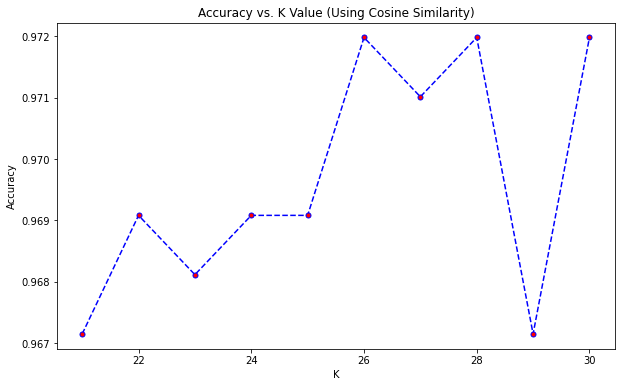

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_value[20:30],accuracy_rate_cosine[20:30],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value (Using Cosine Similarity)')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
accuracy_rate_cosine[25]

0.9719806763285024

Peak lies at k = 26.

Accuracy = 0.97198067



## Trends in the Graphs

- The accuracy plot stabilises after some k. This is because a majority of the labels are not spam, they begin the dominate and thus no spam mail is detected. Thus we can see that in all the distance metrics, the accuracy stabilises to a similar value (almost the per cent of non-spam emails (70%))
- The best accuracy is achieved somewhere in the middle as this is where we get the best idea of the distribution of the data near the test data point
- Cosine distance and Euclidean distance metrics have similar graphs. The accuracy increases in the beginning (till it gets a better idea of the distribution of data around it) till it reaches the peak and then it starts decreasing and then finally stabilises to about 70%.  
- Manhattan distance graph gives the highest accuracy at a much higher k than others. Its accuracy decreases earlier probably because it does not get a good idea of the data distribution around it with this metric. After some time the accuracy begins to increase and then reaches a peak and then it decreases again to become stable at around 70% finally. 
- Accuracy with cosine and Euclidean distance is very good (about 97%) but it is a bit less with manhattan distance (about 93%) and thus we can say that manhattan distance is not a good metric for text-based data. 
